<a href="https://colab.research.google.com/github/Darakry/MINI-PROJECT/blob/main/MINI_PROJECT_SLO_DARA_KUSUMAWATI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.72      0.77      0.74       100
           E       0.75      0.70      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.78      0.78      0.78        27
           E       0.74      0.74      0.74        23

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.86      0.82      0.84        61
           C       0.74      0.79      0.77        39

    accuracy                           0.8

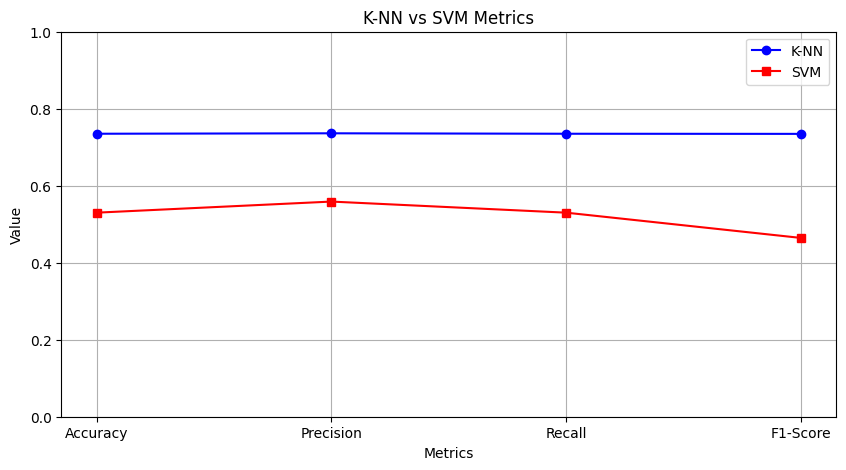

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPA1.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           B       0.70      0.80      0.75       100
           E       0.77      0.66      0.71       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           B       0.85      0.81      0.83        27
           E       0.79      0.83      0.81        23

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.65      0.68      0.67        22
           E       0.74      0.71      0.73        28

    accuracy                           0.7

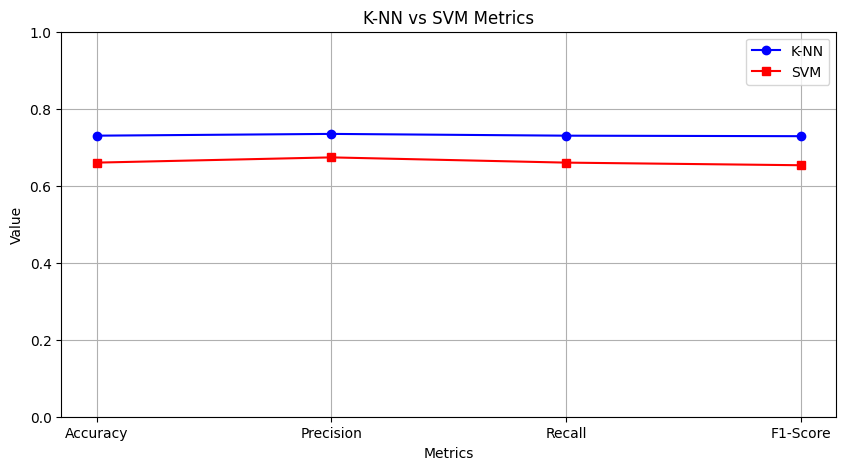

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPA2.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.79      0.86      0.82       200
           E       0.66      0.54      0.59       100

    accuracy                           0.75       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.75      0.75      0.75       300


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.79      0.90      0.84        50
           E       0.72      0.52      0.60        25

    accuracy                           0.77        75
   macro avg       0.76      0.71      0.72        75
weighted avg       0.77      0.77      0.76        75


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           B       0.85      0.50      0.63        22
           E       0.70      0.93      0.80        28

    accuracy                           0.7

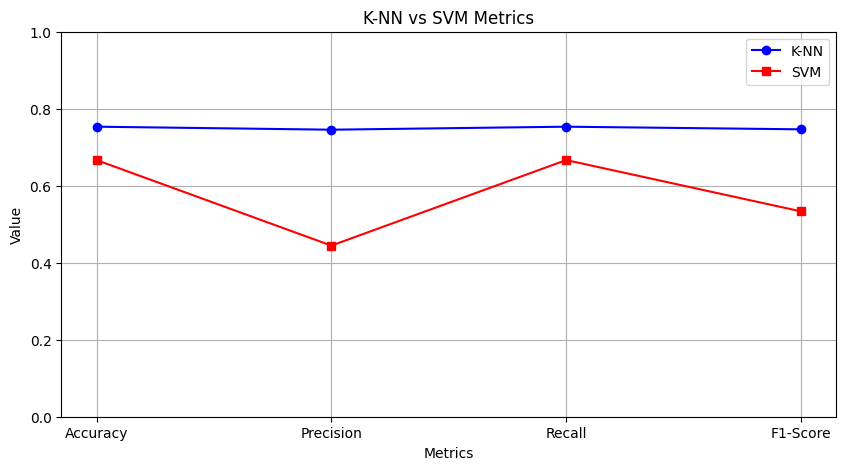

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPA3.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.88      0.88      0.88       100
           C       0.88      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.80      0.89      0.84        54
           E       0.60      0.43      0.50        21

    accuracy                           0.7

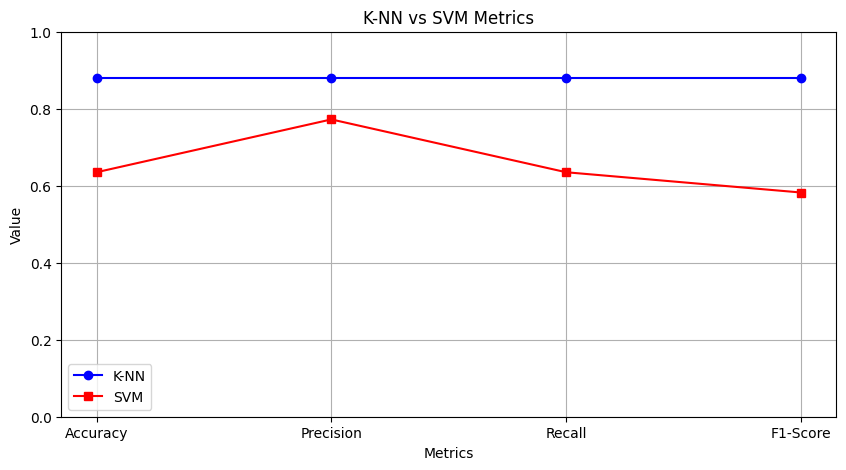

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB1.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.88      0.80      0.84       100
           D       0.82      0.89      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.92      0.85      0.88        27
           D       0.84      0.91      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.95      0.91      0.93        22
           C       0.93      0.96      0.95        28

    accuracy                           0.9

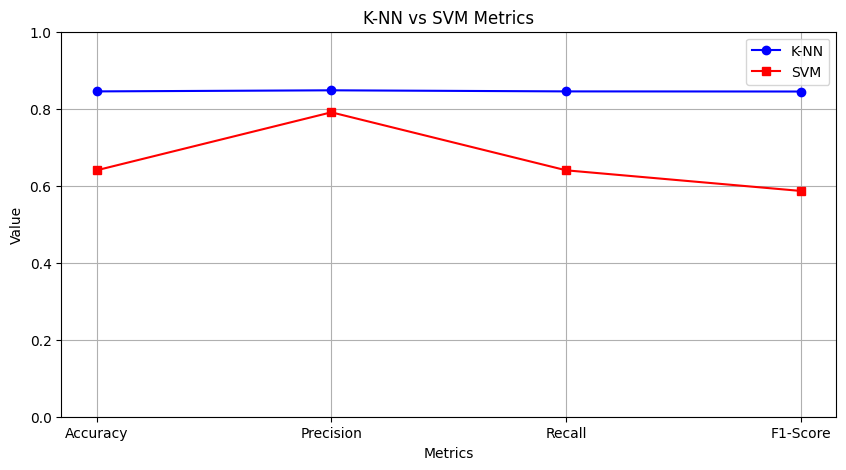

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB2.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           B       0.88      0.84      0.86       100
           C       0.85      0.89      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.90      0.86      0.88        22
           D       0.90      0.93      0.91        28

    accuracy                           0.9

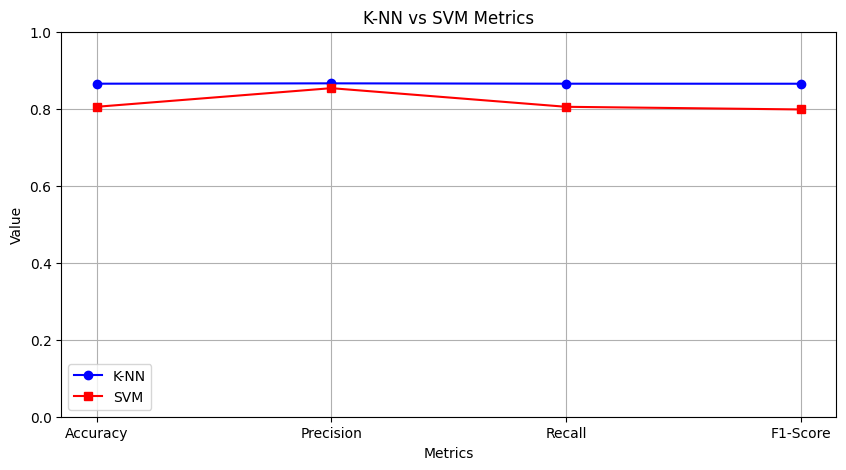

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB3.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           B       0.95      0.83      0.89       100
           D       0.85      0.96      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           D       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           B       1.00      0.64      0.78        22
           C       0.78      1.00      0.88        28

    accuracy                           0.8

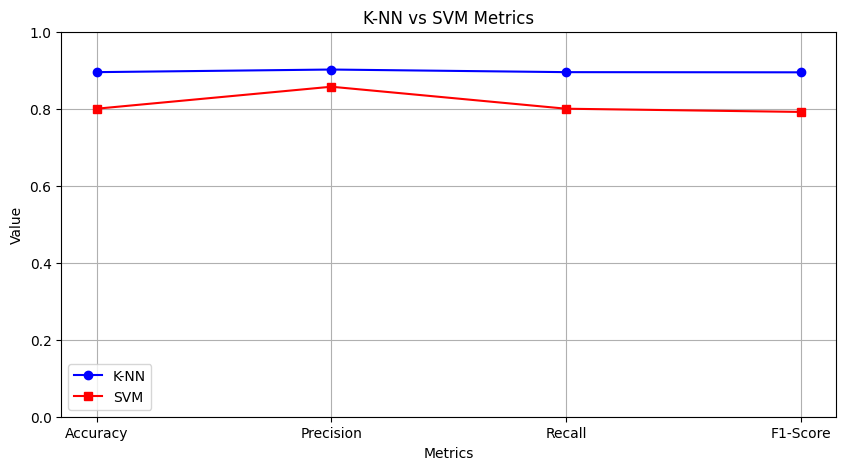

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB4.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.90      0.89      0.90       200
           C       0.79      0.81      0.80       100

    accuracy                           0.86       300
   macro avg       0.84      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.94      0.88      0.91        50
           C       0.79      0.88      0.83        25

    accuracy                           0.88        75
   macro avg       0.86      0.88      0.87        75
weighted avg       0.89      0.88      0.88        75


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           B       0.88      0.64      0.74        22
           D       0.76      0.93      0.84        28

    accuracy                           0.8

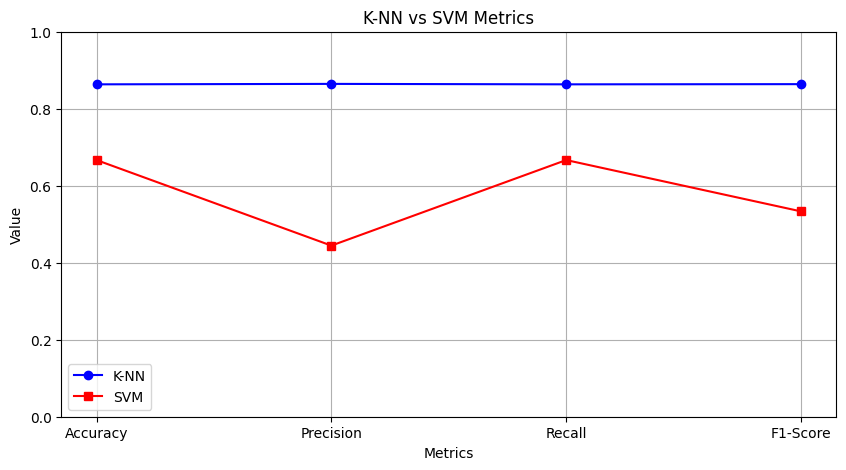

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB5.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.91      0.85      0.88       200
           D       0.74      0.83      0.78       100

    accuracy                           0.85       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.85      0.85      0.85       300


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.93      0.84      0.88        50
           D       0.73      0.88      0.80        25

    accuracy                           0.85        75
   macro avg       0.83      0.86      0.84        75
weighted avg       0.87      0.85      0.86        75


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       1.00      0.89      0.94        54
           C       0.78      1.00      0.88        21

    accuracy                           0.9

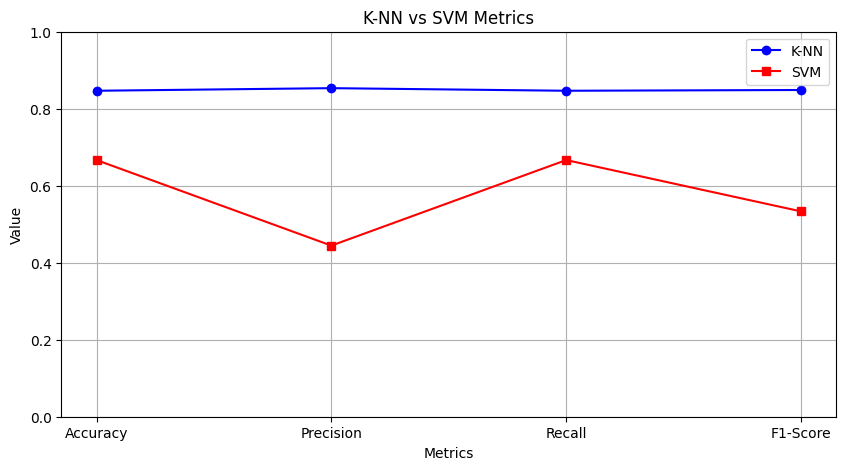

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB6.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

K-NN - 10-fold Cross Validation:
              precision    recall  f1-score   support

           A       0.87      0.83      0.85       200
           C       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400


K-NN - 75% training, 25% testing:
              precision    recall  f1-score   support

           A       0.91      0.81      0.86        52
           C       0.81      0.92      0.86        48

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100


K-NN - 50% training, 25% validation, dan 25% testing (Validation Set):
              precision    recall  f1-score   support

           A       0.86      0.82      0.84        61
           C       0.74      0.79      0.77        39

    accuracy                           0.8

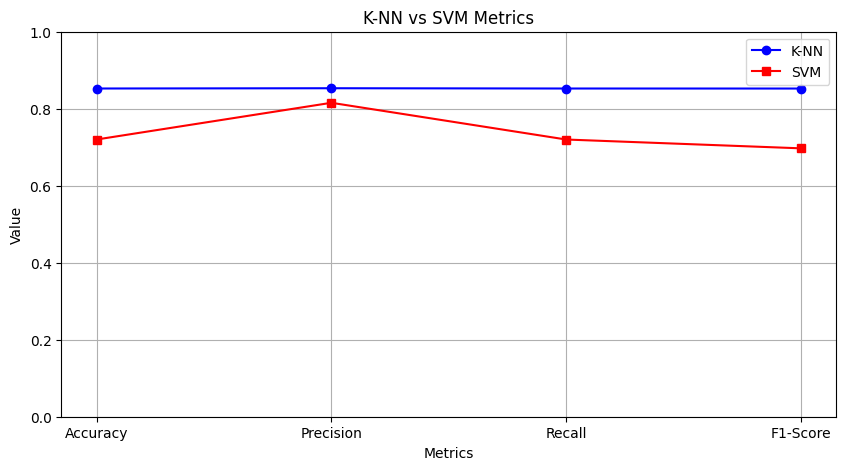

In [175]:
# Membaca data dari file CSV
df = pd.read_csv('/content/CPB7.csv')

# Memisahkan fitur (X) dan label (y)
X = df[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = df['kelas']

# Classifier: K-NN
clf_knn = KNeighborsClassifier()

# Skenario: 10-fold Cross Validation
cv_predictions_knn = cross_val_predict(clf_knn, X, y, cv=10)
print("K-NN - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_knn))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_knn.fit(X_train, y_train)
predictions_25_knn = clf_knn.predict(X_test)
print("\nK-NN - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_knn))

# Skenario: 50% training, 25% validation, dan 25% testing
clf_knn.fit(X_train_50, y_train_50)
predictions_valid_knn = clf_knn.predict(X_valid)
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_knn))
print("\nK-NN - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_knn = clf_knn.predict(X_test)
print(classification_report(y_test, predictions_test_knn))


# K-NN Metrics
print("\nK-NN Metrics:")
accuracy_knn = accuracy_score(y, cv_predictions_knn)
precision_knn = precision_score(y, cv_predictions_knn, average='weighted')
recall_knn = recall_score(y, cv_predictions_knn, average='weighted')
f1_knn = f1_score(y, cv_predictions_knn, average='weighted')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("\n")

# Classifier: SVM
clf_svm = SVC()

# Skenario: 10-fold Cross Validation
cv_predictions_svm = cross_val_predict(clf_svm, X, y, cv=10)
print("SVM - 10-fold Cross Validation:")
print(classification_report(y, cv_predictions_svm))

# Skenario: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_svm.fit(X_train, y_train)
predictions_25_svm = clf_svm.predict(X_test)
print("\nSVM - 75% training, 25% testing:")
print(classification_report(y_test, predictions_25_svm))

# Skenario: 50% training, 25% validation, dan 25% testing
X_train_50, X_temp, y_train_50, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf_svm.fit(X_train_50, y_train_50)
predictions_valid_svm = clf_svm.predict(X_valid)
print("\nSVM - 50% training, 25% validation, dan 25% testing (Validation Set):")
print(classification_report(y_valid, predictions_valid_svm))
print("\nSVM - 50% training, 25% validation, dan 25% testing (Test Set):")
predictions_test_svm = clf_svm.predict(X_test)
print(classification_report(y_test, predictions_test_svm))

# SVM Metrics
print("\nSVM Metrics:")
accuracy_svm = accuracy_score(y, cv_predictions_svm)
precision_svm = precision_score(y, cv_predictions_svm, average='weighted')
recall_svm = recall_score(y, cv_predictions_svm, average='weighted')
f1_svm = f1_score(y, cv_predictions_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("\n")

# Grafik akurasi K-NN dan SVM (garis)
plt.figure(figsize=(10, 5))

# Metrik K-NN
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_knn, precision_knn, recall_knn, f1_knn], label='K-NN', marker='o', color='blue')

# Metrik SVM
plt.plot(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy_svm, precision_svm, recall_svm, f1_svm], label='SVM', marker='s', color='red')

plt.title('K-NN vs SVM Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Mengabaikan peringatan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)